In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
Start = "2015-01-01"
Today = date.today().strftime("%Y-%m-%d")

# Getting the stock price data from Yahoo Finance
ticker = 'SBIN.NS'
data = yf.download(ticker, Start, Today)
df = data
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,312.450012,315.000000,310.700012,314.000000,295.929199,6138488
2015-01-02,314.350006,318.299988,314.350006,315.250000,297.107300,9935094
2015-01-05,316.250000,316.799988,312.100006,312.750000,294.751129,9136716
2015-01-06,310.000000,311.100006,298.700012,299.899994,282.640686,15329257
2015-01-07,300.000000,302.549988,295.149994,300.149994,282.876251,15046745
...,...,...,...,...,...,...
2023-04-24,543.799988,555.549988,543.500000,554.599976,554.599976,23335611
2023-04-25,555.000000,567.900024,555.000000,561.799988,561.799988,38142390
2023-04-26,562.000000,567.000000,556.450012,566.349976,566.349976,23143882


In [3]:
df = df.reset_index()
df.head()

# Moving average 100 calculation
ma100 = df.Close.rolling(100).mean()

# Moving average 200 calculation
ma200 = df.Close.rolling(200).mean()

(2055, 7)

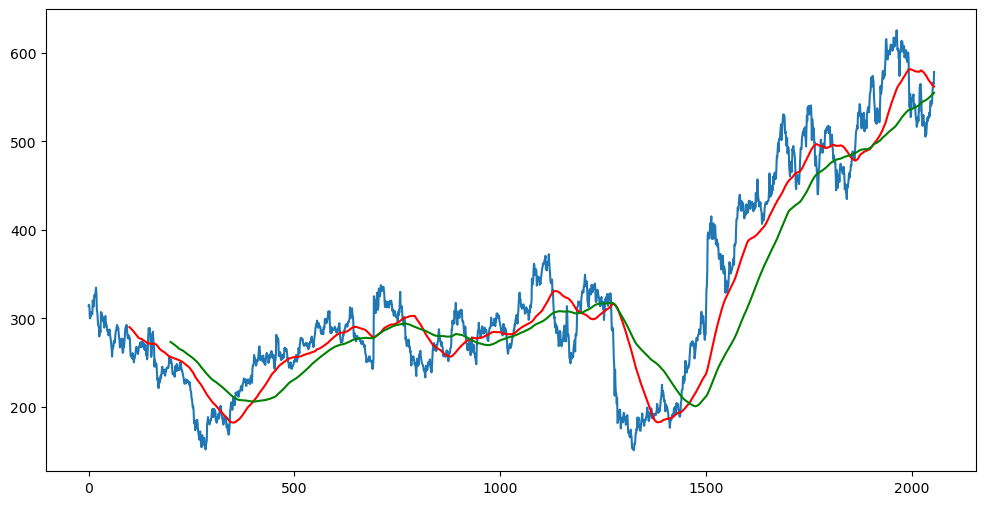

In [4]:
# Chart for ma100 and ma200
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
df.shape

In [5]:
# Preprocessing the data
# Resample to daily frequency, forward fill missing values, and drop any remaining NaNs
data = data['Close'].resample('D').ffill().dropna()

# Scaling the data
scaler = MinMaxScaler()
data = scaler.fit_transform(np.array(data).reshape(-1, 1))

# Creating the features and target variables
lookback = 60 # Number of days to look back
X = []
y = []
for i in range(lookback, len(data)):
    X.append(data[i-lookback:i, 0])
    y.append(data[i, 0])
X, y = np.array(X), np.array(y)

In [6]:
# Splitting the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshaping the data for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
# Creating the CNN model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(lookback, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [8]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Fitting the model to the data
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
75/75 [==============================] - 1s 9ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 2/200
75/75 [==============================] - 1s 7ms/step - loss: 8.8283e-04 - val_loss: 0.0015
Epoch 3/200
75/75 [==============================] - 0s 7ms/step - loss: 6.3562e-04 - val_loss: 0.0013
Epoch 4/200
75/75 [==============================] - 1s 7ms/step - loss: 4.4318e-04 - val_loss: 0.0013
Epoch 5/200
75/75 [==============================] - 1s 7ms/step - loss: 3.5602e-04 - val_loss: 9.8830e-04
Epoch 6/200
75/75 [==============================] - 0s 7ms/step - loss: 3.4108e-04 - val_loss: 5.1953e-04
Epoch 7/200
75/75 [==============================] - 1s 7ms/step - loss: 3.2947e-04 - val_loss: 7.2759e-04
Epoch 8/200
75/75 [==============================] - 0s 6ms/step - loss: 2.7788e-04 - val_loss: 0.0013
Epoch 9/200
75/75 [==============================] - 0s 6ms/step - loss: 2.5151e-04 - val_loss: 4.2200e-04
Epoch 10/200
75/75 [==============================] - 0s 6ms/

75/75 [==============================] - 0s 6ms/step - loss: 1.7542e-04 - val_loss: 3.2987e-04
Epoch 78/200
75/75 [==============================] - 0s 6ms/step - loss: 1.6503e-04 - val_loss: 3.8170e-04
Epoch 79/200
75/75 [==============================] - 0s 6ms/step - loss: 1.4838e-04 - val_loss: 4.0524e-04
Epoch 80/200
75/75 [==============================] - 0s 6ms/step - loss: 1.6362e-04 - val_loss: 0.0011
Epoch 81/200
75/75 [==============================] - 0s 6ms/step - loss: 1.6116e-04 - val_loss: 3.4902e-04
Epoch 82/200
75/75 [==============================] - 0s 6ms/step - loss: 1.5568e-04 - val_loss: 7.0473e-04
Epoch 83/200
75/75 [==============================] - 0s 6ms/step - loss: 1.7946e-04 - val_loss: 3.4720e-04
Epoch 84/200
75/75 [==============================] - 0s 6ms/step - loss: 1.3111e-04 - val_loss: 5.5569e-04
Epoch 85/200
75/75 [==============================] - 0s 6ms/step - loss: 1.3990e-04 - val_loss: 7.0169e-04
Epoch 86/200
75/75 [=========================

Epoch 153/200
75/75 [==============================] - 0s 7ms/step - loss: 1.3317e-04 - val_loss: 4.1695e-04
Epoch 154/200
75/75 [==============================] - 0s 7ms/step - loss: 1.3896e-04 - val_loss: 3.1403e-04
Epoch 155/200
75/75 [==============================] - 0s 6ms/step - loss: 1.2769e-04 - val_loss: 4.8019e-04
Epoch 156/200
75/75 [==============================] - 1s 7ms/step - loss: 1.2739e-04 - val_loss: 3.6286e-04
Epoch 157/200
75/75 [==============================] - 1s 8ms/step - loss: 1.1744e-04 - val_loss: 4.1643e-04
Epoch 158/200
75/75 [==============================] - 1s 7ms/step - loss: 1.1859e-04 - val_loss: 3.6755e-04
Epoch 159/200
75/75 [==============================] - 1s 7ms/step - loss: 1.1861e-04 - val_loss: 4.4441e-04
Epoch 160/200
75/75 [==============================] - 1s 7ms/step - loss: 1.1695e-04 - val_loss: 8.8681e-04
Epoch 161/200
75/75 [==============================] - 1s 8ms/step - loss: 1.2541e-04 - val_loss: 4.2829e-04
Epoch 162/200
75/75

In [9]:
model.save('keras_CNN_model.h5')

In [10]:
# Predicting the stock prices for the test set
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

19/19 [==============================] - 0s 3ms/step


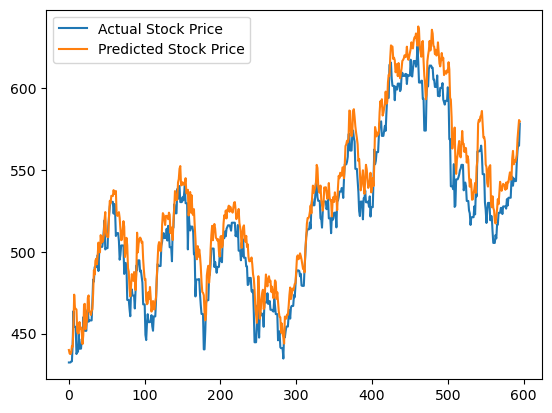

In [11]:
# Visualizing the results
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Stock Price')
plt.plot(predicted_stock_prices, label='Predicted Stock Price')
plt.legend()
plt.show()